In [487]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import mglearn

In [488]:
boston = load_boston()
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [493]:
ex_boston = mglearn.datasets.load_extended_boston
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
display(boston_df)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [491]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

predict_test_data = reg.predict(X_test)
score_test_data = reg.score(X_test, y_test)

print(f'Score: {score_test_data}\n')
print(f'Predict: {predict_test_data[:10]}')

Score: 0.509785478689029

Predict: [21.23333333 39.26666667 24.06666667 12.86666667 21.43333333 21.86666667
 21.46666667 27.8        33.23333333 14.16666667]


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("lr.coef_:\n{}".format(lr.coef_))
print("lr.intercept_:\n{}".format(lr.intercept_))

lr.coef_:
[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
lr.intercept_:
36.93325545712031


In [ ]:
print('Wynik zestawu uczącego: {:.2f}'.format(lr.score(X_train, y_train)))
print('Wynik zestawu testowego: {:.2f}'.format(lr.score(X_test, y_test)))

Wynik zestawu uczącego: 0.77
Wynik zestawu testowego: 0.64


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print('Wynik zestawu uczącego: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Wynik zestawu testowego: {:.2f}'.format(ridge.score(X_test, y_test)))

Wynik zestawu uczącego: 0.77
Wynik zestawu testowego: 0.63


In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('Wynik zestawu uczącego: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Wynik zestawu testowego: {:.2f}'.format(ridge10.score(X_test, y_test)))

Wynik zestawu uczącego: 0.76
Wynik zestawu testowego: 0.61


In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Wynik zestawu uczącego: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Wynik zestawu testowego: {:.2f}'.format(ridge01.score(X_test, y_test)))

Wynik zestawu uczącego: 0.77
Wynik zestawu testowego: 0.63


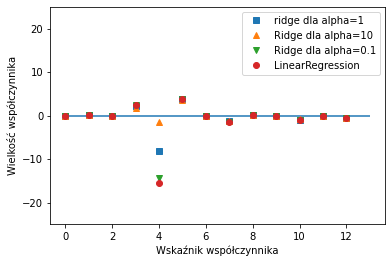

In [ ]:
plt.plot(ridge.coef_, 's', label='ridge dla alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge dla alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge dla alpha=0.1')
plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Wskaźnik współczynnika')
plt.ylabel('Wielkość współczynnika')
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()